In [42]:
import torch
from torch import nn
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]


In [44]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
X = X.to(device)
Y = Y.to(device)

cuda


In [46]:
class MyNeuralNet(nn.Module):
        def __init__(self):
                super().__init__()
                self.input_to_hidden_layer = nn.Linear(2, 8)
                self.hidden_layer_activation = nn.ReLU()
                self.hidden_layer_to_ouput_layer = nn.Linear(8, 1)
        def forward(self, x):
                x = self.input_to_hidden_layer(x)
                x = self.hidden_layer_activation(x)
                x = self.hidden_layer_to_ouput_layer(x)
                return x

In [47]:
my_net = MyNeuralNet().to(device)

In [48]:
print(nn.Linear(2, 7))


Linear(in_features=2, out_features=7, bias=True)


In [49]:
loss_func = nn.MSELoss()

In [50]:
Y_hat = my_net(X)
loss_value = loss_func(Y_hat, Y)
print(loss_value)

tensor(102.0220, device='cuda:0', grad_fn=<MseLossBackward0>)


In [51]:
optimizer = SGD(my_net.parameters(), lr=0.001)

In [52]:
# hyper params
no_of_epochs = 50

In [53]:
loss_history = []
for _ in range(no_of_epochs):
    optimizer.zero_grad()
    loss_value = loss_func(my_net(X), Y)
    loss_value.backward()
    optimizer.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'loss value')

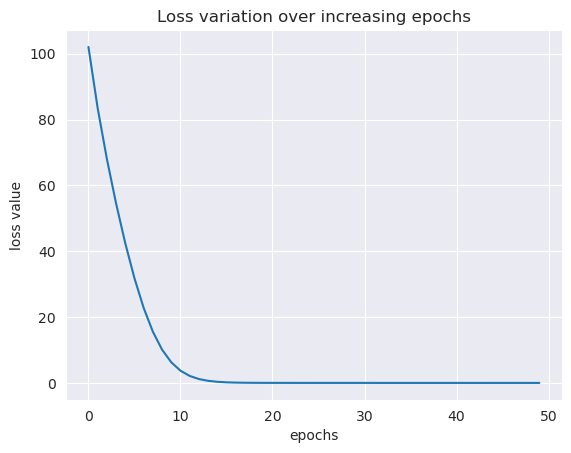

In [59]:
sns.set_style('darkgrid')
loss_history_cpu = [l.detach().cpu().numpy() for l in loss_history]
plt.plot(loss_history_cpu)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')